In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np

def conv(z, h, omega_lambda, omega_matter):

    H0=100*h
#conversion Mpc --> km
    conv1=1./(1e6*206265*1.496e8)
#conversion de s --> Gyr
    conv2=3600*24*365.25*1e9
    H0=H0*conv1*conv2

    c1=np.sqrt(omega_lambda*(1.+z)**(-3.))+np.sqrt((omega_lambda*(1.+z)**(-3.))+omega_matter)
    ln=np.log(c1/np.sqrt(omega_matter))
    c2=2./(3.*np.sqrt(omega_lambda))
        
    time = (1./H0)*c2*ln

    return time

In [3]:
#Parametro de Inestabilidad del disco
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
G = 4.299e-6

vector = ('00','01','03','09','13','14','18','19','20','21')
snapshot=range(497,160,-15)
for isnap in snapshot:

    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    a = snap['subhalo_000/Time'].value
    z = (a0/a)-1
    t = conv(z, h, omega_lambda, omega_matter)
    
    print isnap
    
    for i in range(0,10):
        fo =open('/home/ornela/python/inest-s'+'%s' %vector[i]+'.dat','a')
        
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
        vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value
        masa_str = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value
        
        pgas = snap['subhalo_0'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
        masa_gas = snap['subhalo_0'+ str('%s' %vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
        masa_drk = snap['subhalo_0'+ str('%s' %vector[i])+ '/Drk/Masses'].value
        
#-------------paso las coordenadas respecto al centro de la galaxia------------------
        xstr = (pstr[:,0]-cm[0])/h
        ystr = (pstr[:,1]-cm[1])/h
        zstr = (pstr[:,2]-cm[2])/h
        r = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])/h
        ygas = (pgas[:,1]-cm[1])/h
        zgas = (pgas[:,2]-cm[2])/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])/h
        ydrk = (pdrk[:,1]-cm[1])/h
        zdrk = (pdrk[:,2]-cm[2])/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
        
#---------------masas------------------------------------
        masa_str = masa_str/h
        masa_gas = masa_gas/h
        masa_drk = masa_drk/h
        
        rgal=0.15*r200
        
        limit = np.where(r<rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
        
        Mc_str = cumsum((masa_str[limit])[r_indice])
        
#----------------------calculamos r50---------------------------    
        Mtot_str = Mc_str[-1]
    
        razon = Mc_str/Mtot_str
 
        cincuenta, = np.where(razon < 0.5)
        r50 = r_sort[cincuenta]
                
#----------calculamos la masa total----------------------
        rtot= concatenate([r,rgas,rdrk])
        mtot= concatenate([masa_str, masa_gas, masa_drk])
        
        limit_tot = np.where(rtot<rgal)
        rtot_sort = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        M_total = Mc_tot * 1e10
        
#-------------calculamos la velocidad maxima a r50 y Vstr---------------------
        Vm = np.sqrt((G*M_total[cincuenta])/rtot_sort[cincuenta])
        Vmax = Vm[-1]
        Vstr = np.sqrt((G*Mc_str[-1]*1e10)/r50[-1])
#------------calculamos el parametro de inestabilidad del disco----------------
        epsilon = Vmax/Vstr
        
        fo.write(str('%.6f'% t) +'\t'+
                 str('%12.6f'% epsilon) +'\n')
        fo.close()
        
        

497
482
467
452
437
422
407
392
377
362
347
332
317
302
287
272
257
242
227
212
197
182
167


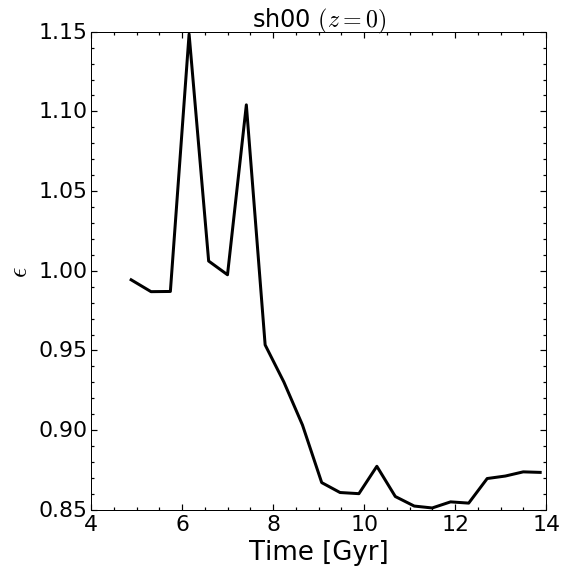

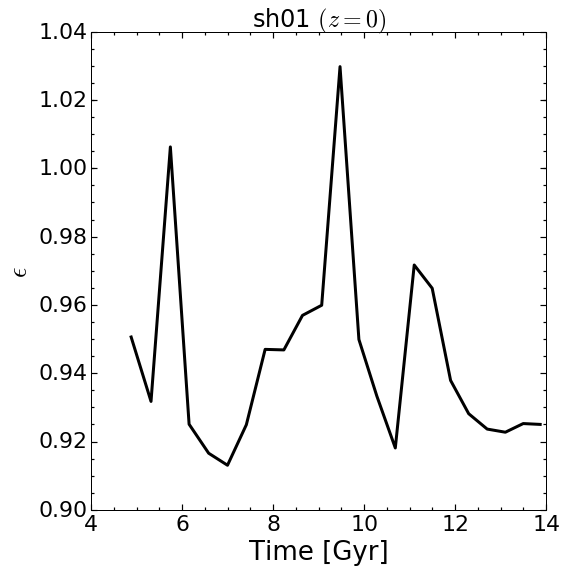

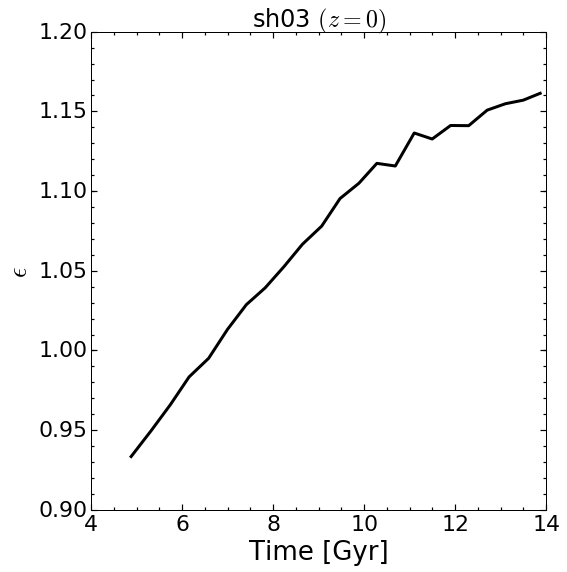

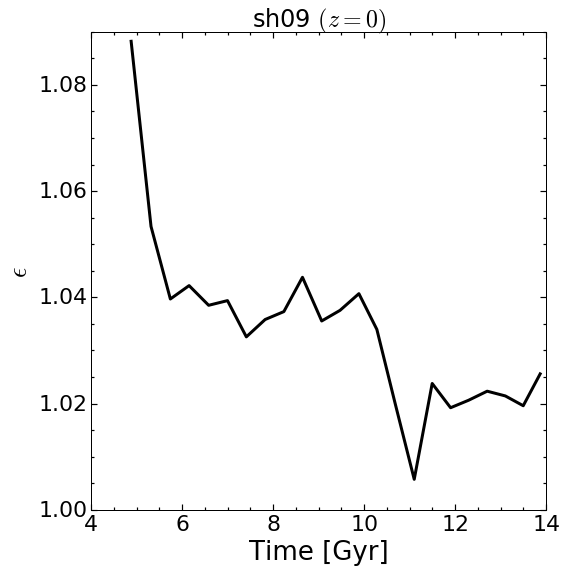

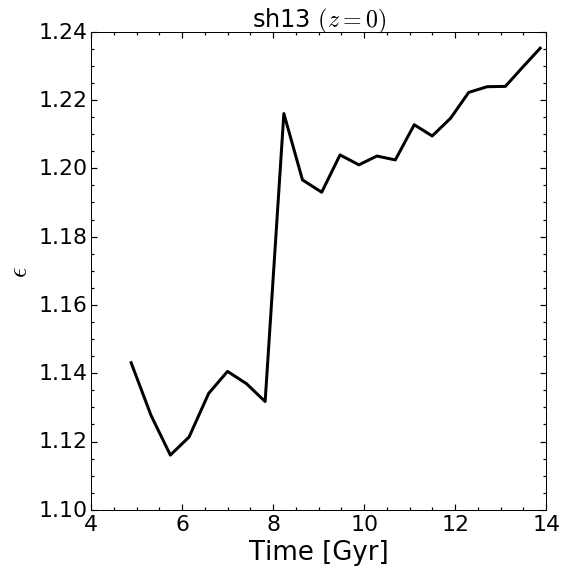

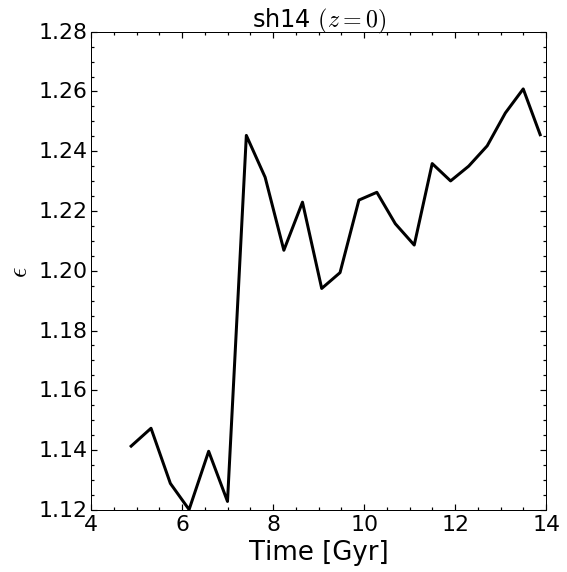

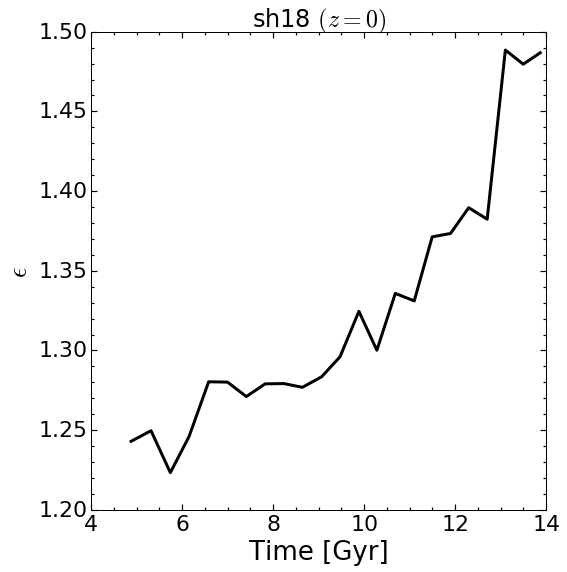

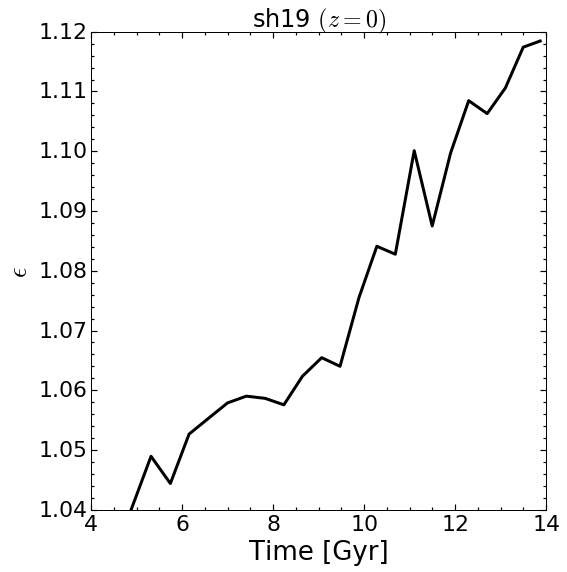

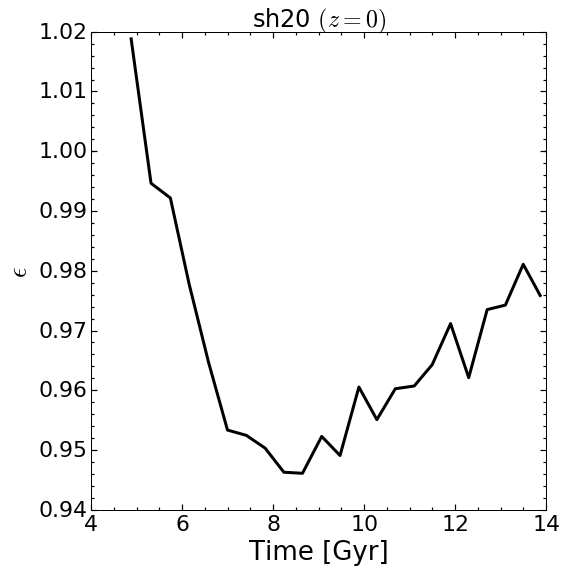

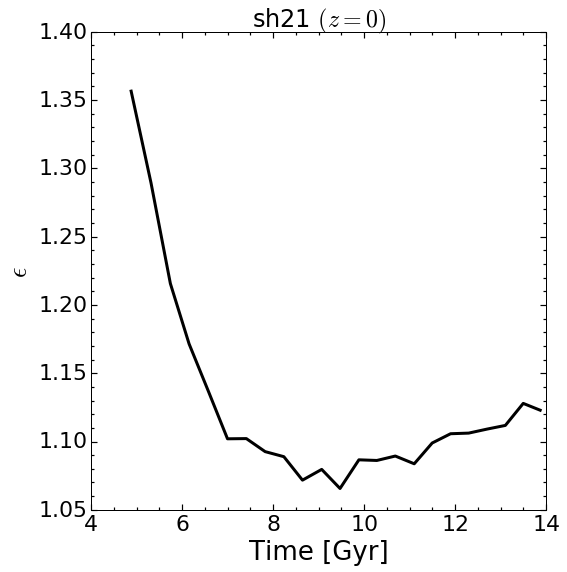

In [10]:
# Grafico de time vs inest
import matplotlib.pyplot as plt

vector = ('00','01','03','09','13','14','18','19','20','21')

for i in range(0,10):
    cm=np.loadtxt('/home/ornela/python/inest-s'+'%s' %vector[i]+'.dat')
    
    t=cm[:,0]
    epsilon =cm[:,1]
        
    fig=plt.figure(i,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    ax.plot(t,epsilon, 'k', lw=3)
    ax.set_title('sh'+'%s' %vector[i]+' $(z=0)$', fontsize=24)
    plt.xlabel('Time [Gyr]', fontsize=26)
    plt.ylabel(u'$f_{disc}$', fontsize=26)
    ax.set_xlim(4,14)
    ax.minorticks_on()
    ax.tick_params( labelsize=22,)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')    
    #fig.savefig('%s' %name+'-inest.png', dpi = 300)

plt.show()

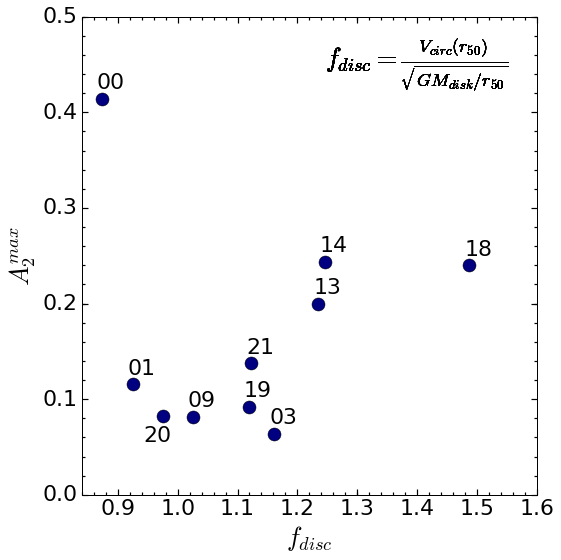

In [4]:
# Grafico de A2max vs inest
#t, A2max, krot, Mgal, Mgas, Mvir
import matplotlib.pyplot as plt

vector = ('00','01','03','09','13','14','18','19','20','21')
vec2 = ('navy', 'c', 'darkviolet','navy', 'c', 'darkviolet', 'navy', 'c', 'darkviolet', 'magenta')
j=0
k=0
l=0

for i in range(0,10):
    cm1=np.loadtxt('/home/ornela/python/inest-s'+'%s' %vector[i]+'.dat')
    cm2=np.loadtxt('/home/ornela/python/A2-krot-s'+'%s' %vector[i]+'.dat')
    
    A2max=cm2[:,1]
    epsilon =cm1[:,1]
    
    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax1=fig.add_subplot(111)
    ax1.plot(epsilon[0],A2max[0],'o',markersize=13, color='navy')
    ax1.set_ylim(0,0.5)
    ax1.set_xlim(0.84,1.6)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=22)
    ax1.tick_params('both', length=3, width=1.2,which='minor')
    ax1.tick_params('both', length=6, width=1.2,which='major')  
    ax1.set_xlabel(u'$f_{disc}$', fontsize=26)
    ax1.set_ylabel(u'$A_{2}^{max}$', fontsize=26)
    plt.text(x = 1.4, y = 0.45, s =r'$f_{disc} =\frac{V_{circ}(r_{50})}{\sqrt{GM_{disk}/r_{50}}}$',
             fontsize = 26, verticalalignment = 'center', horizontalalignment = 'center')
    if i == 8:
        plt.annotate(str('%s'%vector[i]), xy=(epsilon[0],A2max[0]), 
                     xytext=(-20, -25), textcoords='offset points', fontsize=22)
    else:
        plt.annotate(str('%s'%vector[i]), xy=(epsilon[0],A2max[0]), 
                     xytext=(-5, +10), textcoords='offset points', fontsize=22)

fig.savefig('fdisc_vs_A2max.png', dpi = 80)
plt.show()